### 1. Load History OHCLV 

create a new terminal and 

Download-data: 
`
freqtrade download-data --config user_data/config.json --timeframe 15m --timerange 20240101-20250101
`

File-like:
`
BTC_USDT-15m.feather
`


In [1]:
import pandas as pd 
import os
import re
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../../')

file_path = '../../../freqtrade/user_data/data/binance/futures'
time_frame = '1d'

def extract_coin_symbols(directory):
    coin_list = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            coin_list.append(coin_symbol)
    
    return coin_list


if os.path.exists(file_path) and os.path.isdir(file_path):
    coins = extract_coin_symbols(file_path)
print(coins)

['BTC/USDT:USDT', 'ETH/USDT:USDT', 'BNB/USDT:USDT', 'DOGE/USDT:USDT', 'SOL/USDT:USDT', 'XRP/USDT:USDT', '1000PEPE/USDT:USDT', '1000SHIB/USDT:USDT', 'AAVE/USDT:USDT', 'ADA/USDT:USDT', 'ARB/USDT:USDT', 'AVAX/USDT:USDT', 'ENA/USDT:USDT', 'ETC/USDT:USDT', 'FIL/USDT:USDT', 'LINK/USDT:USDT', 'LTC/USDT:USDT', 'NEAR/USDT:USDT', 'SEI/USDT:USDT', 'SUI/USDT:USDT', 'WLD/USDT:USDT', 'XLM/USDT:USDT', 'TRUMP/USDT:USDT', '1000FLOKI/USDT:USDT', '1000SATS/USDT:USDT', 'ACT/USDT:USDT', 'AERGO/USDT:USDT', 'APT/USDT:USDT', 'ATH/USDT:USDT', 'BABY/USDT:USDT', 'BANANAS31/USDT:USDT', 'BANANA/USDT:USDT', 'BANK/USDT:USDT', 'BCH/USDT:USDT', 'BROCCOLI714/USDT:USDT', 'BROCCOLIF3B/USDT:USDT', 'BR/USDT:USDT', 'BTCDOM/USDT:USDT', 'DEEP/USDT:USDT', 'DOT/USDT:USDT', 'EDU/USDT:USDT', 'EPT/USDT:USDT', 'FHE/USDT:USDT', 'FIS/USDT:USDT', 'FORM/USDT:USDT', 'FORTH/USDT:USDT', 'FUN/USDT:USDT', 'GRASS/USDT:USDT', 'GUN/USDT:USDT', 'HBAR/USDT:USDT', 'HIPPO/USDT:USDT', 'HMSTR/USDT:USDT', 'HYPER/USDT:USDT', 'ICP/USDT:USDT', 'INIT/USD

### 2. Pair Filter

In [2]:
import random
target_coins = coins
# target_coins = random.sample(target_coins, 2)
# target_coins =['BTC/USDT','ETH/USDT','XRP/USDT']

len(target_coins)

395

### 3. Load History OHLCV 

In [5]:
def extract_coin_data(directory):
    coin_list = {}
    symbols = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            if coin_symbol in target_coins: 
                df = pd.read_feather(f'{directory}/{filename}')
                df = df.reset_index(drop=True)
                if len(df) > 0 :
                    coin_list[coin_symbol] = df
                    symbols.append(coin_symbol)
    
    return coin_list,symbols


if os.path.exists(file_path) and os.path.isdir(file_path):
    coins,symbols = extract_coin_data(file_path)
print(len(coins))
print(symbols)

395
['BTC/USDT:USDT', 'ETH/USDT:USDT', 'BNB/USDT:USDT', 'DOGE/USDT:USDT', 'SOL/USDT:USDT', 'XRP/USDT:USDT', '1000PEPE/USDT:USDT', '1000SHIB/USDT:USDT', 'AAVE/USDT:USDT', 'ADA/USDT:USDT', 'ARB/USDT:USDT', 'AVAX/USDT:USDT', 'ENA/USDT:USDT', 'ETC/USDT:USDT', 'FIL/USDT:USDT', 'LINK/USDT:USDT', 'LTC/USDT:USDT', 'NEAR/USDT:USDT', 'SEI/USDT:USDT', 'SUI/USDT:USDT', 'WLD/USDT:USDT', 'XLM/USDT:USDT', 'TRUMP/USDT:USDT', '1000FLOKI/USDT:USDT', '1000SATS/USDT:USDT', 'ACT/USDT:USDT', 'AERGO/USDT:USDT', 'APT/USDT:USDT', 'ATH/USDT:USDT', 'BABY/USDT:USDT', 'BANANAS31/USDT:USDT', 'BANANA/USDT:USDT', 'BANK/USDT:USDT', 'BCH/USDT:USDT', 'BROCCOLI714/USDT:USDT', 'BROCCOLIF3B/USDT:USDT', 'BR/USDT:USDT', 'BTCDOM/USDT:USDT', 'DEEP/USDT:USDT', 'DOT/USDT:USDT', 'EDU/USDT:USDT', 'EPT/USDT:USDT', 'FHE/USDT:USDT', 'FIS/USDT:USDT', 'FORM/USDT:USDT', 'FORTH/USDT:USDT', 'FUN/USDT:USDT', 'GRASS/USDT:USDT', 'GUN/USDT:USDT', 'HBAR/USDT:USDT', 'HIPPO/USDT:USDT', 'HMSTR/USDT:USDT', 'HYPER/USDT:USDT', 'ICP/USDT:USDT', 'INIT

### 3. History Data Transform

In [6]:
import pandas as pd
close_dfs = []

for symbol, df in coins.items():
    
    temp_df = df[['date', 'close']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    close_dfs.append(temp_df)


close = pd.concat(close_dfs, axis=1)
close.head()

,BTC/USDT:USDT,ETH/USDT:USDT,BNB/USDT:USDT,DOGE/USDT:USDT,SOL/USDT:USDT,XRP/USDT:USDT,1000PEPE/USDT:USDT,1000SHIB/USDT:USDT,AAVE/USDT:USDT,ADA/USDT:USDT,...,T/USDT:USDT,UMA/USDT:USDT,USTC/USDT:USDT,VANRY/USDT:USDT,VELODROME/USDT:USDT,VTHO/USDT:USDT,WAXP/USDT:USDT,WOO/USDT:USDT,XAI/USDT:USDT,XVG/USDT:USDT
date,,,,,,,,,,,,,,,,,,,,,
2019-09-08 00:00:00+00:00,10391.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-09 00:00:00+00:00,10307.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10 00:00:00+00:00,10102.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-11 00:00:00+00:00,10159.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-12 00:00:00+00:00,10415.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. OHLCV Filter

After Filter Shape : (852, 183)


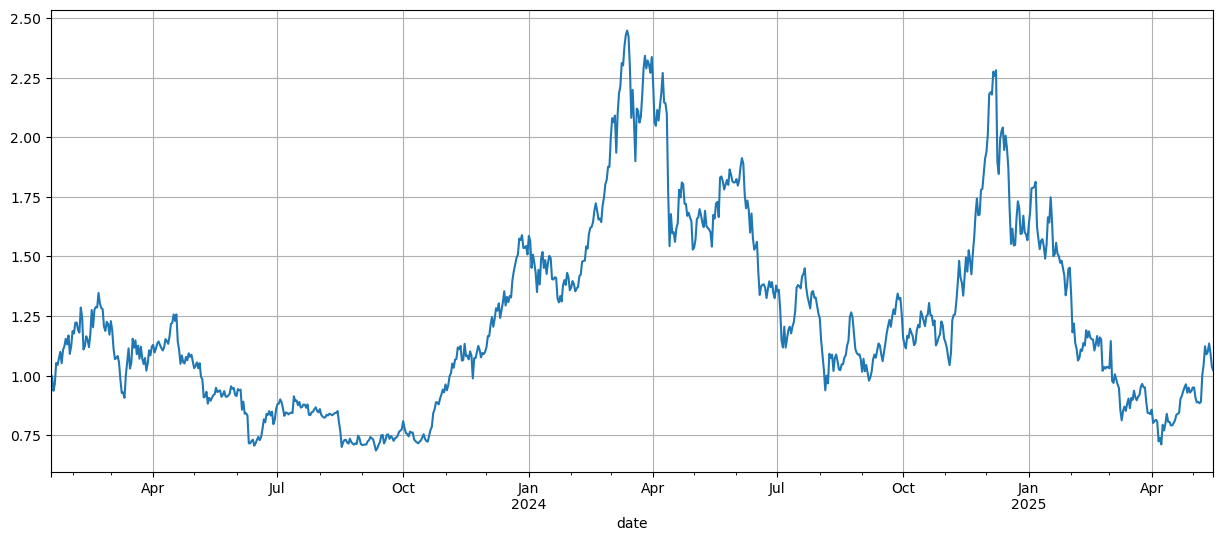

In [29]:
close_filter_date = close[close.index > '2023-01-15']
close_filter_date = close_filter_date[close_filter_date.index < '2025-05-30']

null_counts = close_filter_date.isnull().sum()
null_percentages = (close_filter_date.isnull().mean() * 100).round(2)
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percentages
})
filter_pairs = (null_summary[null_summary['Null Percentage (%)']>35].index.to_list())

close_filter_null = close_filter_date.drop(columns=[col for col in filter_pairs if col in close_filter_date.columns])



close_filter = close_filter_null
print(f'After Filter Shape : {close_filter.shape}')
df_norm = close_filter/close_filter.bfill().iloc[0] #归一化
df_norm.mean(axis=1).plot(figsize=(15,6),grid=True);

### 5. Define Factor


this step is the most important. 

define ur factor



In [31]:
import talib

# F1 reverse momentum
momentum_factor =  -1 * (close_filter/close_filter.shift(3) - 1) * 100
momentum_factor = momentum_factor.apply(lambda row: row - row.min(), axis=1)
momentum_factor = momentum_factor.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

# F2 reverse RSI
rsi_factor = pd.DataFrame(index=close_filter.index)
for currency in close_filter.columns:
    close_prices = close_filter[currency].values
    rsi_values = talib.RSI(close_prices, timeperiod=14)
    rsi_factor[currency] = -rsi_values
rsi_factor = rsi_factor.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

# MultiF
multi_factor = momentum_factor + rsi_factor
multi_factor

,BTC/USDT:USDT,ETH/USDT:USDT,BNB/USDT:USDT,DOGE/USDT:USDT,SOL/USDT:USDT,XRP/USDT:USDT,1000PEPE/USDT:USDT,1000SHIB/USDT:USDT,AAVE/USDT:USDT,ADA/USDT:USDT,...,STG/USDT:USDT,SXP/USDT:USDT,TLM/USDT:USDT,TOKEN/USDT:USDT,TRU/USDT:USDT,T/USDT:USDT,UMA/USDT:USDT,WAXP/USDT:USDT,WOO/USDT:USDT,XVG/USDT:USDT
date,,,,,,,,,,,,,,,,,,,,,
2023-01-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-18 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-19 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-12 00:00:00+00:00,0.396351,-2.142059,0.679248,-1.929861,-0.130244,-0.926946,-3.505751,0.178930,-0.999080,-0.176149,...,0.592784,0.605394,-0.015572,0.081726,-0.230579,1.980836,0.481349,0.993746,-0.013526,-3.691110
2025-05-13 00:00:00+00:00,-0.254031,-2.412004,-0.091131,0.190566,-1.515352,-0.710018,-3.095859,0.808189,-1.541798,0.303866,...,0.448878,1.018934,-0.533199,0.774902,-0.456703,1.748725,-0.177216,1.227968,-0.527153,-5.487636
2025-05-14 00:00:00+00:00,-1.024388,-2.812404,-0.293496,-0.890349,-1.219002,-1.973585,-2.769883,0.085745,-2.019876,0.102358,...,0.923680,1.257986,-0.083771,-0.310772,-0.034285,1.321772,-0.177886,1.023895,-0.421600,-3.300002


### 6. Data transfrom and process

In [32]:
factor = multi_factor.stack()
factor.index.names = ['date', 'asset']
factor = factor.dropna()  # 清理缺失值

price = close_filter
factor.head()

date                       asset         
2023-01-30 00:00:00+00:00  BTC/USDT:USDT    -2.027156
                           ETH/USDT:USDT     0.378287
                           BNB/USDT:USDT    -0.746013
                           DOGE/USDT:USDT   -1.461094
                           SOL/USDT:USDT     0.100366
dtype: float64

### 7. Generate Alpha \ Beta \ Return

In [36]:
import utils.utils as utils
import utils.tears as tears
factor_data = utils.get_clean_factor_and_forward_returns(
    factor=factor,
    prices=price,
    periods=(1,2,3),  
    quantiles = 10
)
# periods means when we adjust position , 1 for 1days 
# quantiles means we split all coins into x basket
factor_data


1D        2D        3D  \
date                      asset                                          
2023-01-30 00:00:00+00:00 BTC/USDT:USDT   0.013125  0.039882  0.029501   
                          ETH/USDT:USDT   0.012197  0.048457  0.049741   
                          BNB/USDT:USDT   0.016179  0.032619  0.053845   
                          DOGE/USDT:USDT  0.089005  0.065791  0.030687   
                          SOL/USDT:USDT  -0.001837  0.043995  0.014943   
...                                            ...       ...       ...   
2025-05-13 00:00:00+00:00 T/USDT:USDT    -0.040209 -0.093473 -0.086684   
                          UMA/USDT:USDT  -0.029539 -0.094380 -0.116715   
                          WAXP/USDT:USDT -0.032726 -0.042023 -0.071030   
                          WOO/USDT:USDT  -0.054737 -0.132770 -0.147820   
                          XVG/USDT:USDT  -0.115825 -0.112116 -0.184072   

                                            factor  factor_quantile  
date                      asset                                      
2023-01-30 00:00:00+00:00 BTC/USDT:USDT  -2.027156                2  
                          ETH/USDT:USDT   0.378287                6  
                          BNB/USDT:USDT  -0.746013                3  
                          DOGE/USDT:USDT -1.461094                2  
                          SOL/USDT:USDT   0.100366                5  
...                                            ...              ...  
2025-05-13 00:00:00+00:00 T/USDT:USDT     1.748725               10  
                          UMA/USDT:USDT  -0.177216                4  
                          WAXP/USDT:USDT  1.227968                9  
                          WOO/USDT:USDT  -0.527153                3  
                          XVG/USDT:USDT  -5.487636                1  

[143452 rows x 5 columns]

Information Analysis


,1D,2D,3D
IC Mean,0.065,0.061,0.058
IC Std.,0.157,0.156,0.153
Risk-Adjusted IC,0.416,0.391,0.379
t-stat(IC),12.024,11.288,10.945
p-value(IC),0.000,0.000,0.000
IC Skew,-0.099,-0.111,-0.150
IC Kurtosis,0.269,0.169,0.054


<Figure size 640x480 with 0 Axes>

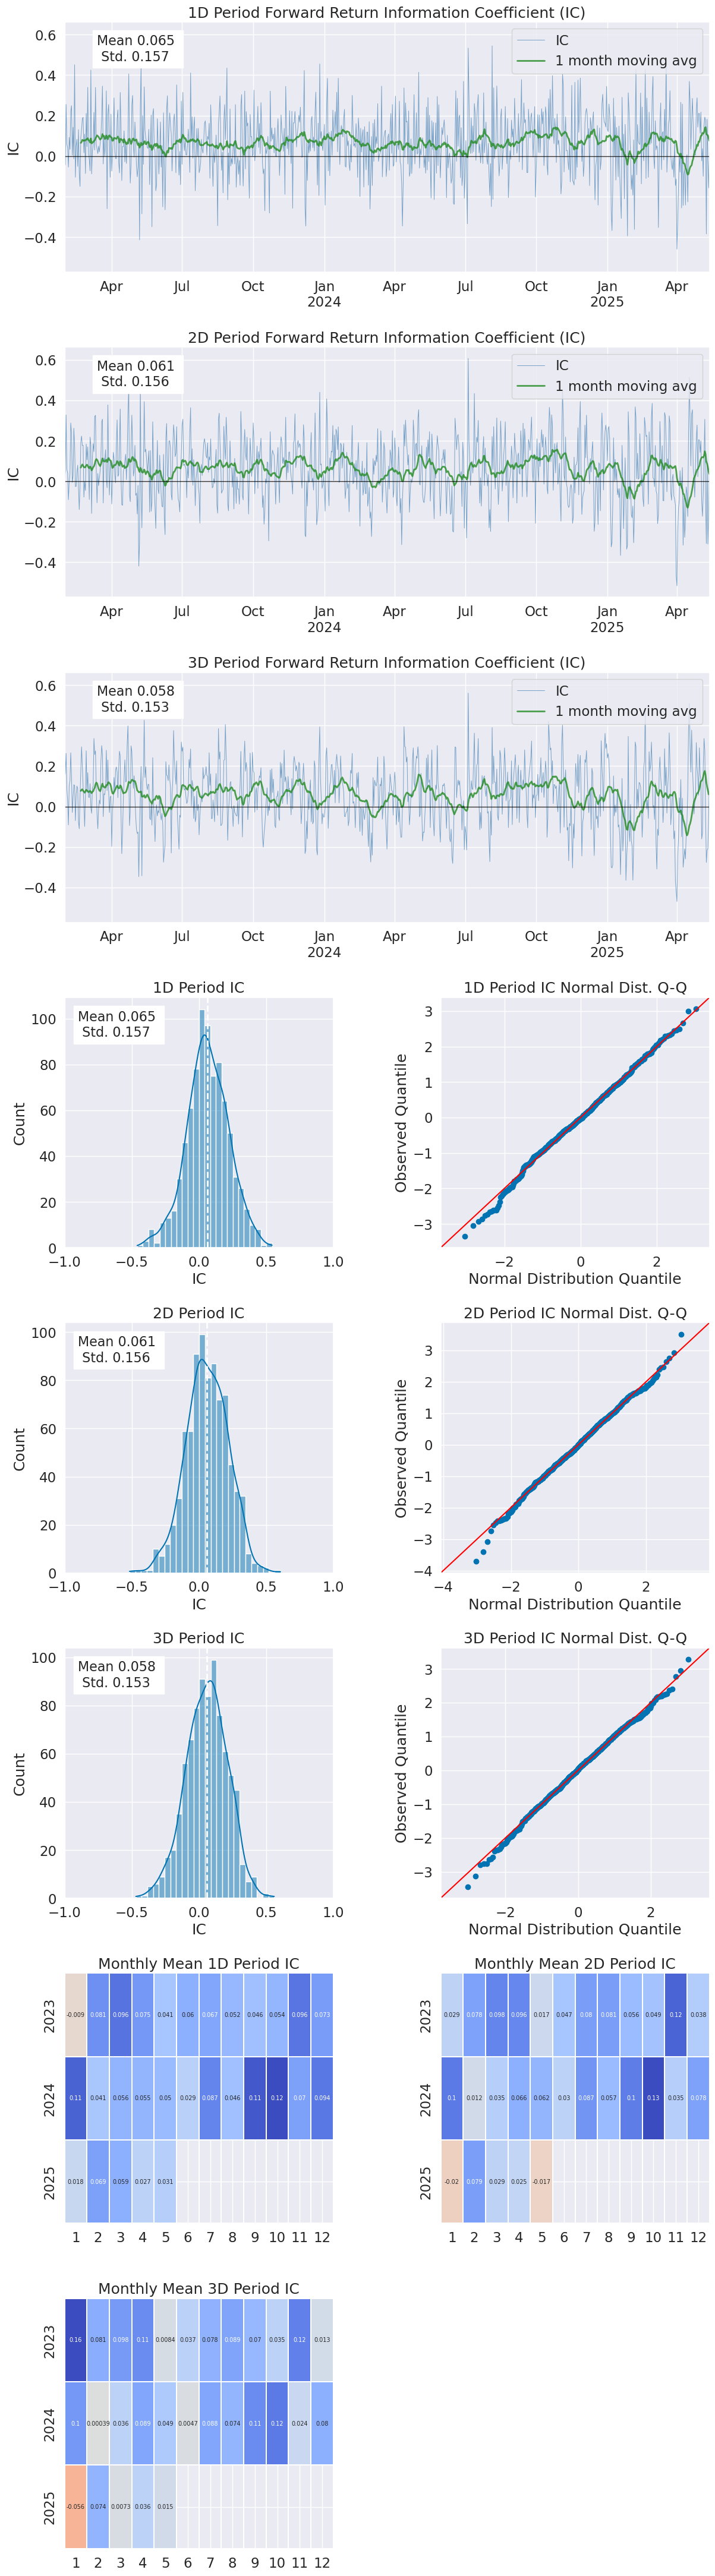

In [37]:
tears.create_information_tear_sheet(
    factor_data
)

After Filter Shape : (852, 183)


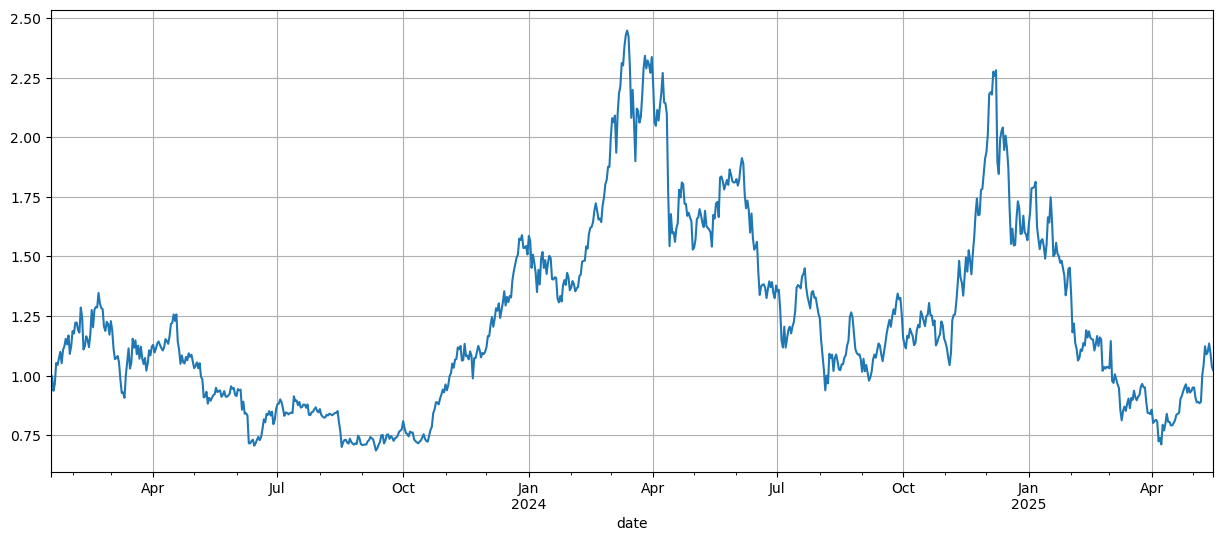

In [39]:
close_filter_date = close[close.index > '2023-01-15']
close_filter_date = close_filter_date[close_filter_date.index < '2025-05-30']

null_counts = close_filter_date.isnull().sum()
null_percentages = (close_filter_date.isnull().mean() * 100).round(2)
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percentages
})
filter_pairs = (null_summary[null_summary['Null Percentage (%)']>35].index.to_list())

close_filter_null = close_filter_date.drop(columns=[col for col in filter_pairs if col in close_filter_date.columns])



close_filter = close_filter_null
print(f'After Filter Shape : {close_filter.shape}')
df_norm = close_filter/close_filter.bfill().iloc[0] #归一化
df_norm.mean(axis=1).plot(figsize=(15,6),grid=True);

<Figure size 640x480 with 0 Axes>

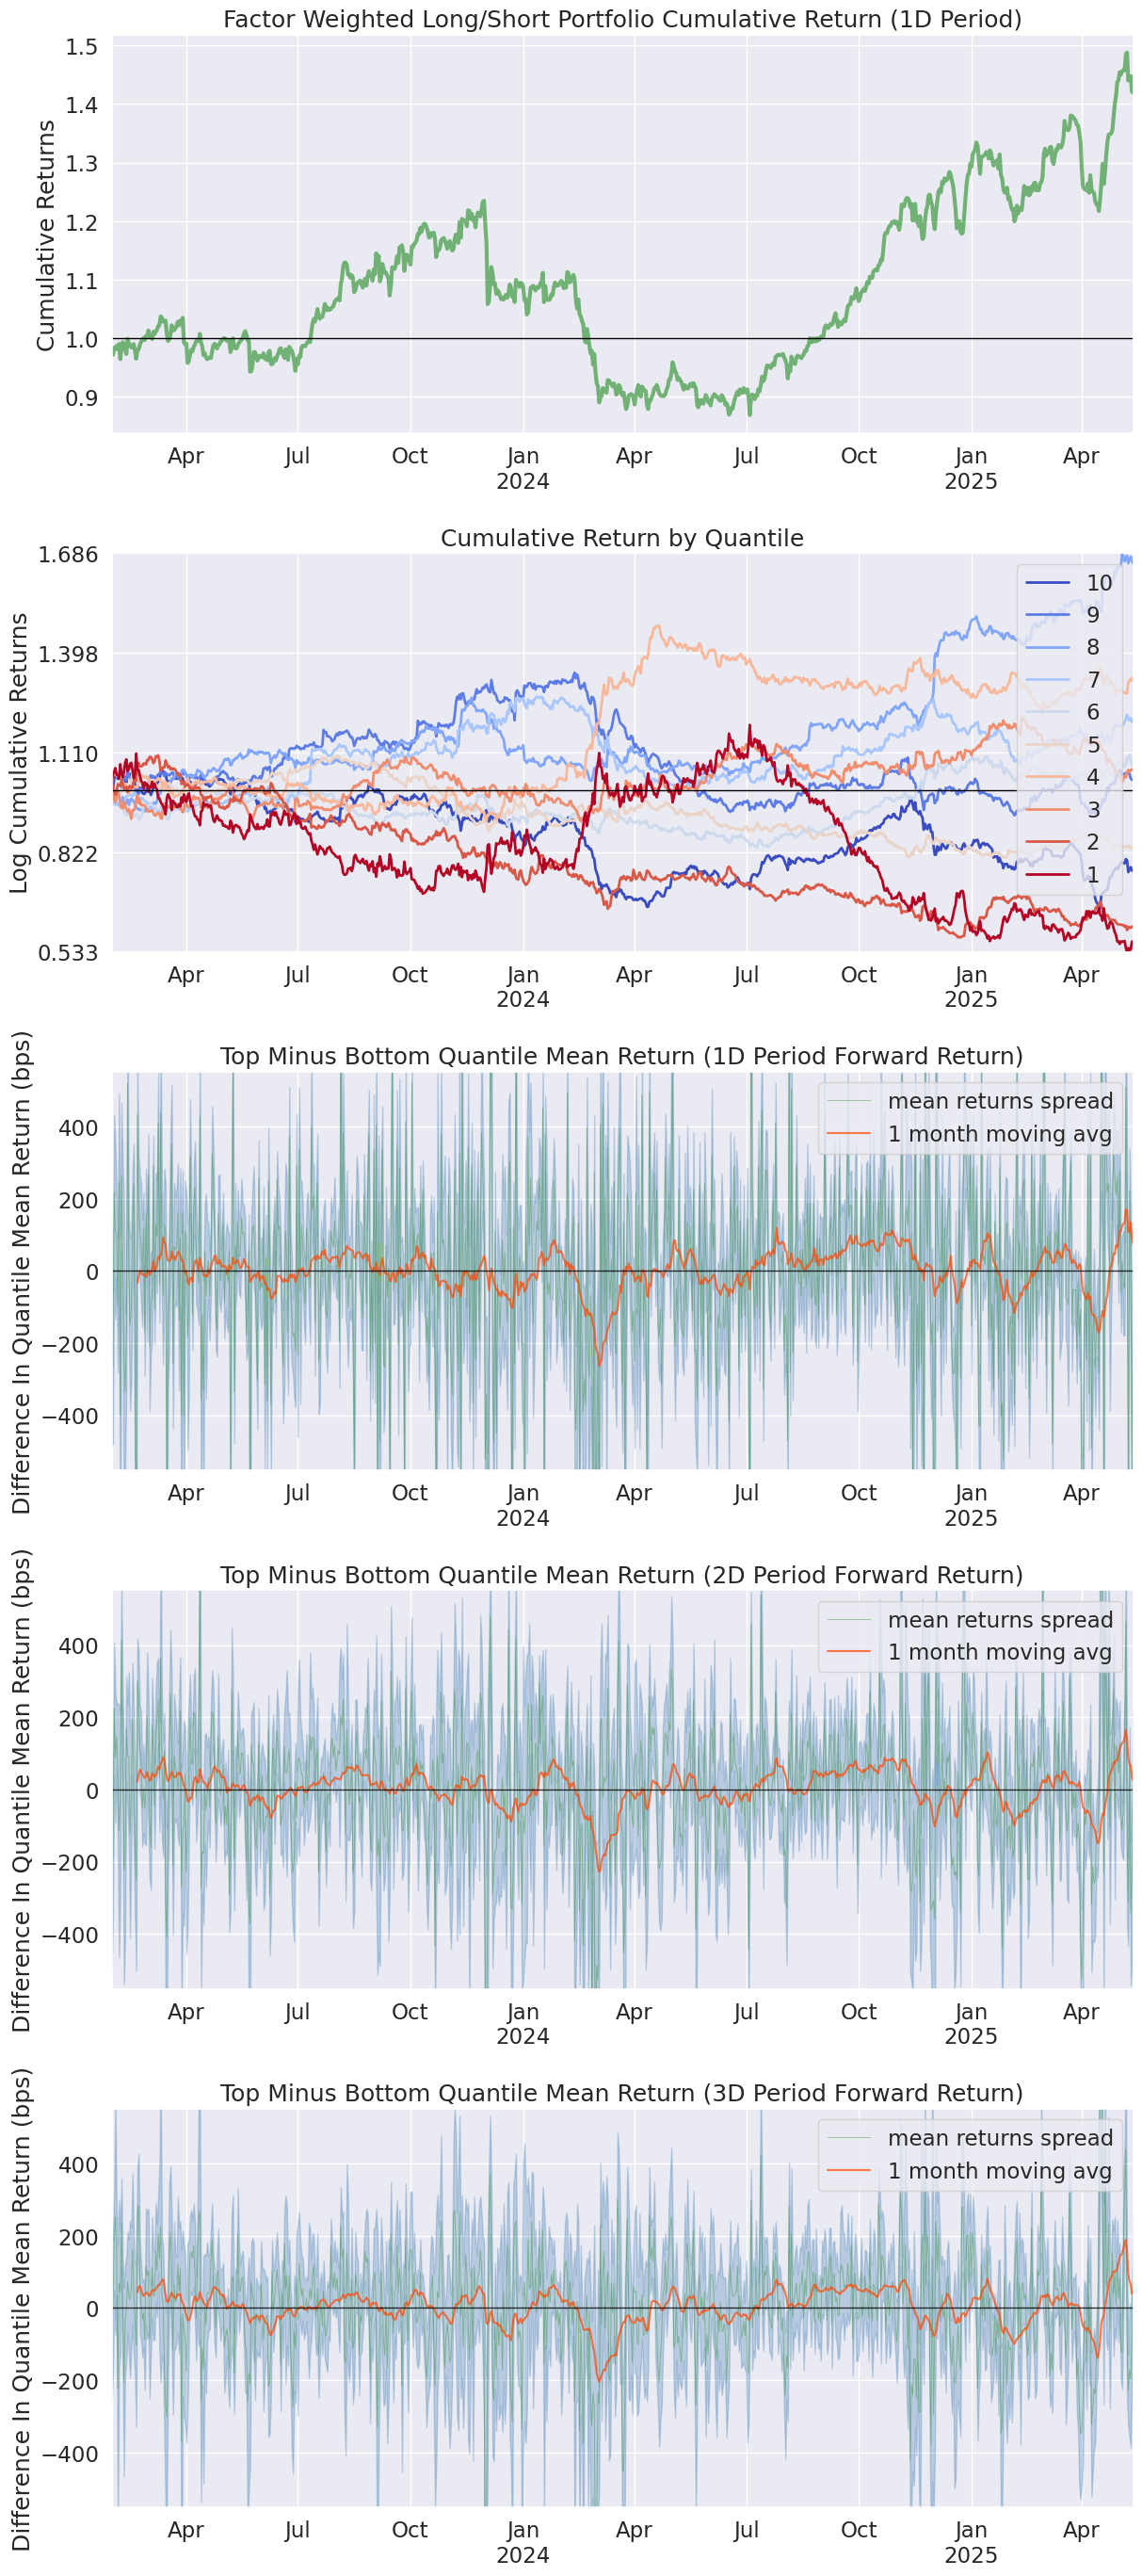

In [38]:

RT = tears.create_returns_tear_sheet(
    factor_data
)
